In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df =pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/loan_data.csv")
df.sample(5)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
8411,I need financial help to install a swimming po...,81570,501,40757,34.26,unemployed,Rejected
15059,I need a loan to finance my MBA and career adv...,182182,470,48238,9.13,employed,Rejected
5459,I need a loan to cover moving expenses after b...,98979,832,33546,23.49,unemployed,Rejected
14721,I need financial help to cover maternity and d...,82444,393,62659,9.55,unemployed,Rejected
3706,I need a loan to cover emergency expenses afte...,55960,594,23786,47.93,employed,Approved


In [29]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [30]:
df.tail()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,employed,Rejected
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected
23999,I need financial help to cover maternity and d...,180440,769,15259,15.06,employed,Approved


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [32]:
df.isnull().sum()

,0
Text,0
Income,0
Credit_Score,0
Loan_Amount,0
DTI_Ratio,0
Employment_Status,0
Approval,0


In [33]:
df.columns

Index(['Text', 'Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio',
       'Employment_Status', 'Approval'],
      dtype='object')

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [36]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df["clean_text"] = df["Text"].apply(preprocess_text)

In [37]:
df["clean_text"].head()

,clean_text
0,need loan pay international vacation family
1,want make home improvements like installing so...
2,need loan home renovation including kitchen re...
3,need funds buy new furniture appliances house
4,need loan start small business


In [38]:
df["Employment_Status"] = df["Employment_Status"].replace({"unemployed": 0, "employed": 1}).astype(int)
df["Approval"] = df["Approval"].replace({"Rejected" : 0, "Approved" : 1}).astype(int)

/tmp/ipython-input-1441878704.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Employment_Status"] = df["Employment_Status"].replace({"unemployed": 0, "employed": 1}).astype(int)
/tmp/ipython-input-1441878704.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Approval"] = df["Approval"].replace({"Rejected" : 0, "Approved" : 1}).astype(int)


In [39]:
df["Employment_Status"].value_counts()

,count
Employment_Status,
0,12007
1,11993


In [40]:
df["Approval"].value_counts()

,count
Approval,
0,20067
1,3933


/tmp/ipython-input-3108820560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment_Status', data=df, palette=['blue', 'gold'])
/tmp/ipython-input-3108820560.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Approval', data=df, palette=['blue', 'gold'])


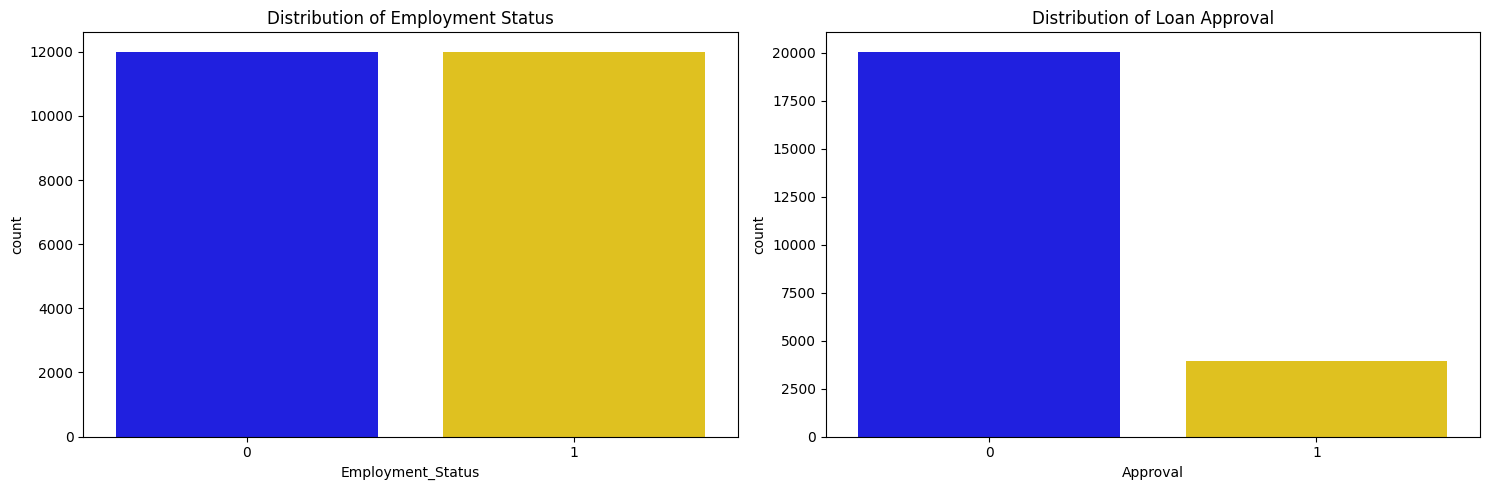

In [43]:
plt.figure(figsize=(15, 5))

# First subplot with 2 colors (blue and yellow) for Employment_Status
plt.subplot(1, 2, 1)
sns.countplot(x='Employment_Status', data=df, palette=['blue', 'gold'])
plt.title('Distribution of Employment Status')

# Second subplot with 2 colors (blue and yellow) for Approval
plt.subplot(1, 2, 2)
sns.countplot(x='Approval', data=df, palette=['blue', 'gold'])
plt.title('Distribution of Loan Approval')

plt.tight_layout()
plt.show()

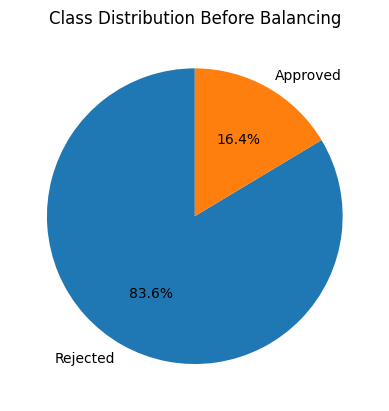

In [44]:
df['Approval'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Rejected', 'Approved'], startangle=90)
plt.title('Class Distribution Before Balancing')
plt.ylabel('')
plt.savefig('Class Distribution Before Balancing.png')
plt.show()

In [45]:
rejected = df[df["Approval"] == 0 ]

approved = df[df["Approval"] == 1]

# Downsample the majority class (Rejected) to match the minority class size
rejected_downsampled = rejected.sample(n=len(approved), random_state=42)

# Combine both classes into a balanced dataset
df_balanced = pd.concat([rejected_downsampled, approved])

# Check the new class distribution
print("\nBalanced Class Distribution (Downsampling):")
df_balanced["Approval"].value_counts()


Balanced Class Distribution (Downsampling):


,count
Approval,
0,3933
1,3933


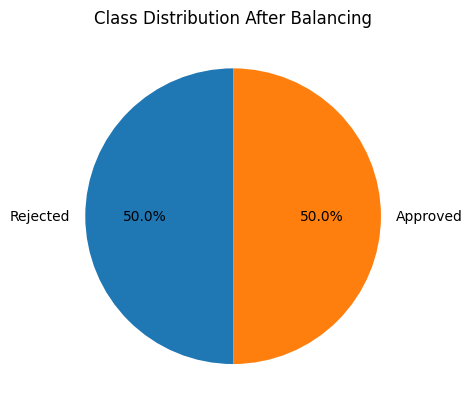

In [46]:
df_balanced['Approval'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Rejected', 'Approved'], startangle=90)
plt.title('Class Distribution After Balancing')
plt.ylabel('')
plt.savefig("Class Distribution After Balancing.png")
plt.show()

In [47]:
vectorizer = TfidfVectorizer(max_features=100)
X_text = vectorizer.fit_transform(df_balanced["clean_text"]).toarray()

In [48]:
scaler = StandardScaler()
structured_features = df_balanced[["Income", "Credit_Score", "Loan_Amount", "DTI_Ratio", "Employment_Status"]]
X_structured = scaler.fit_transform(structured_features)

In [49]:
X_combined = np.hstack((X_text, X_structured))

In [50]:
X = X_combined
y = df_balanced["Approval"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report (Downsampling):\n", classification_report(y_test, y_pred))

Classification Report (Downsampling):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       787
           1       0.97      1.00      0.98       787

    accuracy                           0.98      1574
   macro avg       0.98      0.98      0.98      1574
weighted avg       0.98      0.98      0.98      1574



In [51]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 98.16%


In [52]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Create a DataFrame for training data predictions
train_predictions = pd.DataFrame({"Actual": y_train, "Predicted": y_train_pred, "Probability": y_train_proba})

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame for testing data predictions
test_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred, "Probability": y_test_proba})

print("==" *25)
print("Training Data Predictions:")
print(train_predictions.sample(5, random_state=42).to_string(index=False))

print("==" *25)
print("Testing Data Predictions:")
print(test_predictions.sample(5, random_state=42).to_string(index=False))

try:
    train_predictions.to_csv("train_predictions.csv", index=False)
    test_predictions.to_csv("test_predictions.csv", index=False)
except Exception as e:
    print(f"Error saving predictions: {str(e)}")

Training Data Predictions:
 Actual  Predicted  Probability
      1          1         0.99
      0          0         0.04
      1          1         1.00
      1          1         1.00
      0          0         0.02
Testing Data Predictions:
 Actual  Predicted  Probability
      1          1         0.89
      1          1         0.95
      1          1         0.98
      1          1         0.96
      1          1         0.96


In [53]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_combined, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.97649301 0.97520661 0.97902098 0.9726637  0.97393516]
Mean Cross-Validation Accuracy: 0.9754638915433649


/tmp/ipython-input-1449413297.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


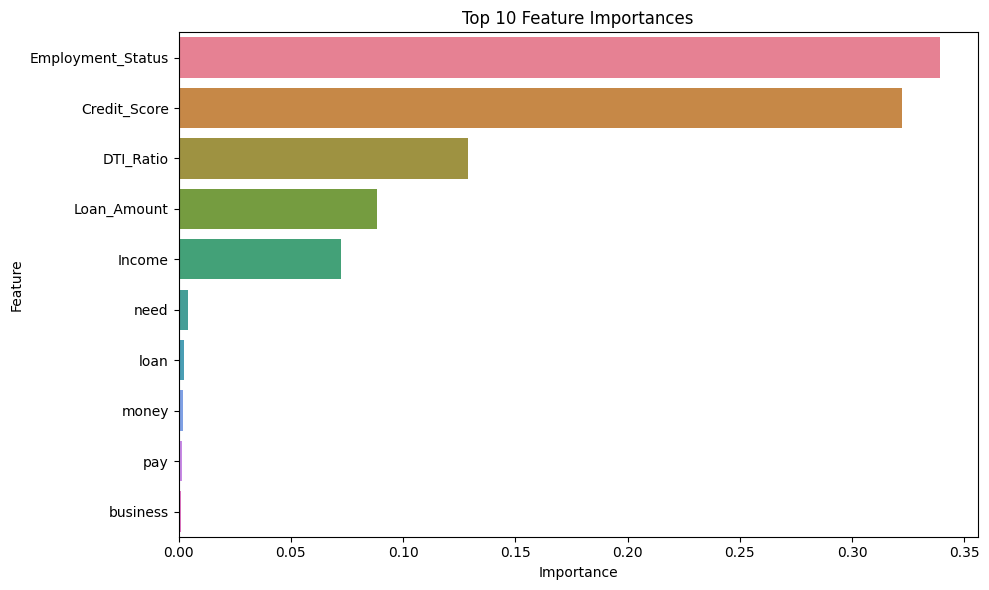

In [56]:
# Sort and prepare feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get top 10 features
top_features = feature_importance_df.head(10)

# Define a color palette with different colors for each bar
colors = sns.color_palette("husl", len(top_features))  # or try: 'Set2', 'tab10', 'pastel'

# Plot with different colors
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features,
    palette=colors
)

plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.savefig("Top 10 Feature Importances.png")
plt.show()

In [55]:
joblib.dump(model, "Random_Forest_model.pkl")
joblib.dump(scaler, "scaler_model.pkl")
joblib.dump(vectorizer, "TfidfVectorizer_model.pkl")

['TfidfVectorizer_model.pkl']